<a href="https://colab.research.google.com/github/JasmineNag/Appliance-Energy-Prediction/blob/main/Copy_of_EDA_Appliances_Energy_Prediction_ipynb_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 

APPLIANCES ENERGY PREDICTION

##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The purpose of this project is to forecast the electricity consumption of a particular household in Belgium based on the temperature and humidity levels of various rooms in the facility and surrounding weather information over 4.5 months. The data set runs 4.5 months at 10 minutes. A ZigBee wireless sensor network is being used to monitor the home’s temperature and humidity levels. Around 3.3 minutes, each wireless node sent the temperature and humidity data. The wireless data was then averaged across intervals of 10 minutes. Every 10 minutes, m-bus energy meters collected the energy data. The experimental data sets were combined with the weather data from the closest airport weather station (Chievres Airport, Belgium), which was extracted from a public data set from Reliable Prognosis (rp5.ru). The data set has two random variables to test the regression models and exclude non-predictive characteristics (parameters).

In this project, we have examined various concrete formulations with different Appliancess. We developed a graphs/charts that aligns to the available information. Utilizing model as a framework, we developed a fresh formulation and, being used to predicted the Appliances.

In histogram charts, 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.

The Insights from bar chart analysis for weedays ,the consumption is higher on weekends , ie week number 0, 6, 5

For hour analysis ,the consumption is high in the evening time , ie hour between 16 and 20

With the hep of EDA ,one can easily analyse the datasets .

# **GitHub Link -**

https://github.com/JasmineNag/Appliance-Energy-Prediction.git

# **Problem Statement**


The increasing trend in energy consumption is becoming cause of concern for the entire world, as the energy consumption is increasing year after year so is the carbon and greenhouse gas emission, the majority portion of the electricity generated is consumed by industrial sector but a considerable amount is also consumed by residential sector. It is important to study the energy consuming behaviour in the residential sector and predict the energy consumption by home appliances as it consume maximum amount of energy in the residence. This project focuses on predicting the energy consumption of home appliances based on humidity and temperature.

#### **Define Your Business Objective?**

To predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure .

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mno
import warnings

### Dataset Loading

In [48]:
# Load Dataset
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
path=('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT2/Appliance Energy Prediction/data_application_energy.csv')

In [50]:
appliance_energy=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT2/Appliance Energy Prediction/data_application_energy.csv')

### Dataset First View

In [51]:
# Dataset First Look
appliance_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Dataset Rows & Columns count

In [52]:
# Dataset Rows & Columns count
appliance_energy.shape

(19735, 29)

**No of rows=19375**

**No of columns=27(2 random variables included)**

**All features are numerical. No categorical Variables.**

### Dataset Information

In [53]:
# Dataset Info
appliance_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [54]:
# Dataset Duplicate Value Count
appliance_energy.duplicated().sum()

0

#### Missing Values/Null Values

In [55]:
# Missing Values/Null Values Count

appliance_energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

There seems to be no null values in data sets.

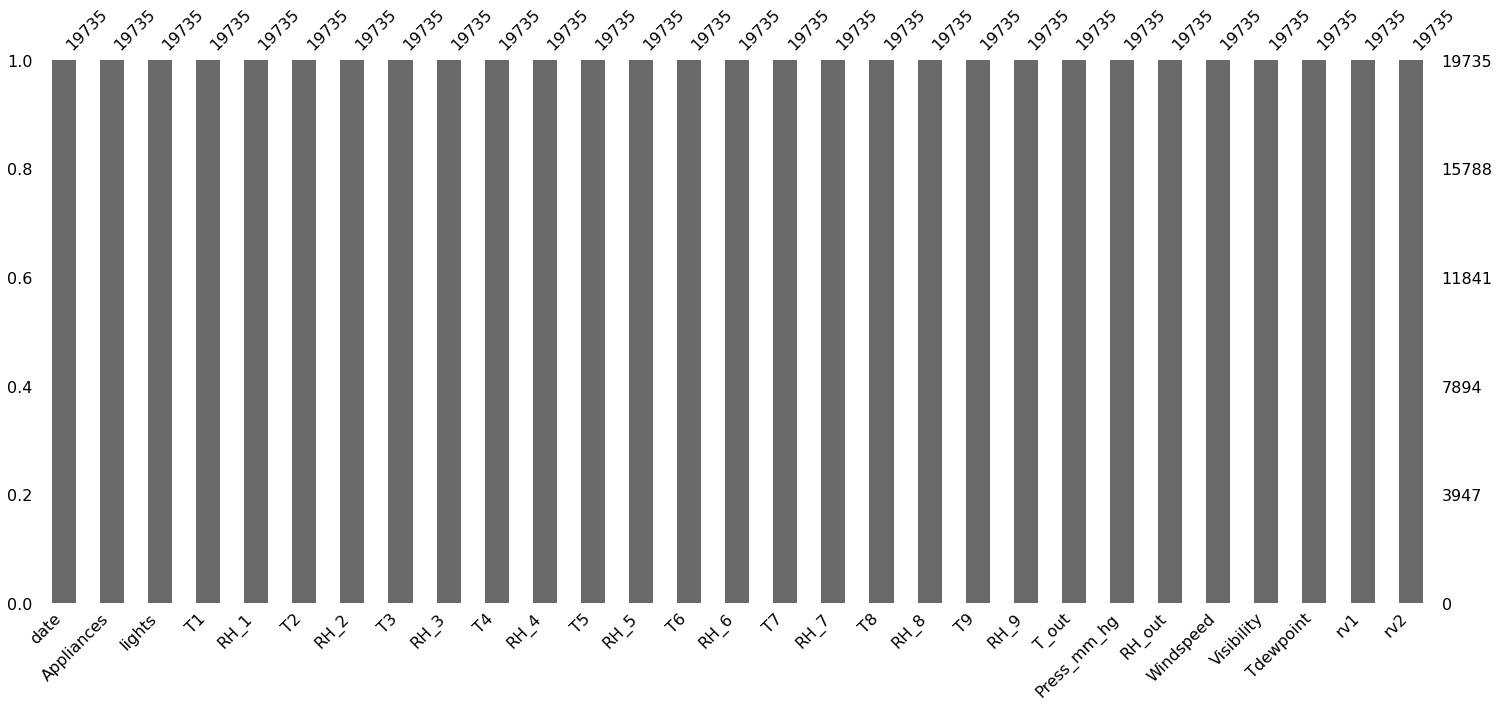

In [56]:
# Visualizing the missing values
mno.bar(appliance_energy)

Each bar represents a column within the dataframe. The height of the bar indicates the level of missing values in that column: the lower the bar is, the more missing values it has. The left side of the plot indicates the percentage of data completeness (where 1.0 = 100%). The right side shows the number of rows.

### What did you know about your dataset?


In info  section, there are 19735 rows and 29 columns .The datasets has 0 duplicate count value and no missing value in the data sets.

## ***2. Understanding Your Variables***

In [57]:
# Dataset Columns
appliance_energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [58]:
# Dataset Describe
appliance_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Variables Description 

Date: time (yr:mon:day:hr:min:sec) 

Appliances: energy use in Wh 

lights: Energy use of light fixtures in the house(Wh)

T1: Temperature in kitchen area(C) 

RH_1: Humidity in kitchen area(%)

T2: Temperature in living room area(C)

 RH_2: Humidity in living room(%)

T3: Temperature in laundry room

 RH_3: Humidity in laundry room area(%)

T4: Temperature in office room(C) 

RH_4: Humidity in office room(%)

T5: Temperature in bathroom in (C)

 RH_5: Humidity in bathroom(%)

T6: Temperature outside the building (north side) in (C)
 
 RH_6: Humidity outside the building (northside)%

T7: Temperature in ironing room in (C) 

RH_7: Humidity in ironing room in (%)

T8:Temperature in teenager room 2 in (C)

 RH_8: Humidity in teenager room 2 in (%)

T9: Temperature in parents room in (C)

 RH_9: Humidity in parents room in %

To: Temperature outside (from Chievres weather station) in (C)

 Pressure (from Chievres weather station): in mm Hg 

RH_out: Humidity outside (from Chievres weather station) in (%) 

Wind speed (from Chievres weather station): in(m/s) 

Visibility (from Chievres weather station): Ordinal data

 Tdewpoint (from Chievres weather station): Cat data

 rv1: Random variable 1(nondimensional) 
 
 rav2: Random variable 2(nondimensional)

### Check Unique Values for each variable.

In [59]:
# Check Unique Values for each variable.
appliance_energy.apply(lambda x: len(x.unique()))

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

Our data is looking very beautifull.It has many features

Number of entries : 19735

No of features : 27 ( 2 Random Variables included )

Target Variable : Appliances


## 3. ***Data Wrangling***

### Data Wrangling Code

In [60]:
# Write your code to make your dataset analysis ready.
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=appliance_energy.copy()

# Checking Shape of True Value
print("No. of Appliances : -",len(df[df['Appliances']==True]))
# Assigning Appliances data to variable df_Appliances
df_Appliances=df[(df['Appliances']==True)]

No. of Appliances : - 0


In [61]:
# T1 data groupby RH_1 Wise
pd.DataFrame(df.groupby('T1')['RH_1'].value_counts().reset_index(name="Count"))

,T1,RH_1,Count
0,16.79,45.290000,2
1,16.79,45.700000,2
2,16.79,45.090000,1
3,16.79,45.163333,1
4,16.79,45.266667,1
...,...,...,...
14099,26.20,43.526667,1
14100,26.20,44.196667,1
14101,26.26,41.623333,1
14102,26.26,43.660000,1


In [62]:
# Function to get all appliance mean & median while passing appliances and dataframe.
def get_mean_median(df,Appliances):
  '''
  This function returns the mean and median of the whole dataset for a particular area code.

  '''
  try:
    return pd.concat([df[(df['Appliances']==Appliances)].describe().iloc[1],
            df[(df['Appliances']==Appliances)].describe().iloc[5]],
            axis=1).rename(columns={"50%":"median"}).fillna("-")
  except:
    print("Invalid Area Code")

In [63]:
# Getting Mean Median for Appliances 270
get_mean_median(df=df,Appliances=270)

,mean,median
Appliances,270.000000,270.000000
lights,6.206897,0.000000
T1,22.041891,22.000000
RH_1,41.450061,41.693333
T2,21.287592,20.790000
RH_2,40.005229,39.633333
T3,23.441080,23.116667
RH_3,40.316257,39.733333
T4,21.228580,21.100000
RH_4,39.618011,39.933333


### What all manipulations have you done and insights you found?

Groupby two variable Temperature and HUmidity and count each values.

Getting mean median value for appliance no. 270 is same for mean median(i.e 270.00,270.00) 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-**Histogram through seaborn**

In [64]:
#Distribution of our appliance energy usage:
appliance_energy.Appliances.describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

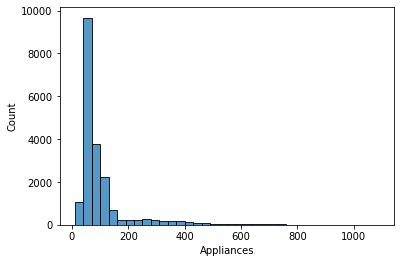

In [65]:
sns.histplot(appliance_energy['Appliances'],binwidth=30)

##### 1. Why did you pick the specific chart?

Creating a histogram will visually represent the given data set or the data distribution. Histograms display the frequency of the data values and a large amount of data. Therefore, the histogram helps determine the dataset’s median and distribution. Also, this can display any gaps or outliers in the data set.

##### 2. What is/are the insight(s) found from the chart?

**75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The main advantages of a histogram are its simplicity and versatility. It can be used in many different situations to offer an insightful look at frequency distribution.

In business , histograms can provide a useful tool for analyzing data and trends. They are used when you want to see how the data is distributed and the frequency of occurrence of some measurable event or property. 

#### Chart - 2 **Barplot**

In [66]:
# Chart - 2 we can create the columnns for weekday and hour of day , to look for hourwise and Weekay wise analysis


import datetime 
def hour_fet(x):
   return pd.to_datetime(x).hour

def weekday_fet(x):
   return pd.to_datetime(x).weekday()
   
appliance_energy['hour']=appliance_energy['date'].apply(hour_fet)
appliance_energy['weekday']=appliance_energy['date'].apply(weekday_fet)

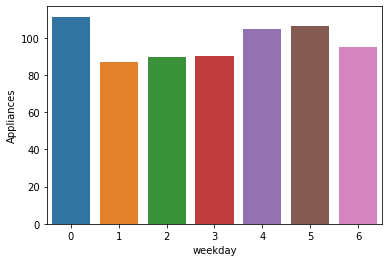

In [67]:
weekday_eng=pd.DataFrame(appliance_energy.groupby('weekday')['Appliances'].mean()).reset_index()
sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'])

**Here we see that , the consumption is higher on weekends , ie week number 0, 6, 5**

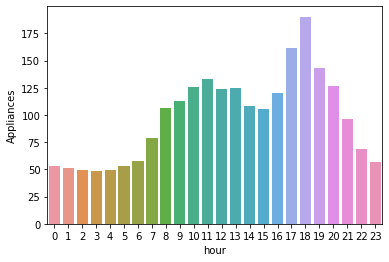

In [68]:
hour_eng=pd.DataFrame(appliance_energy.groupby('hour')['Appliances'].mean()).reset_index()
sns.barplot(x=hour_eng['hour'],y=hour_eng['Appliances'])

**Here we see that the consumption is high in the evening time , ie hour between 16 and 20**

##### 1. Why did you pick the specific chart?

A bar chart describes the comparisons between the discrete categories.

##### 2. What is/are the insight(s) found from the chart?

**For weedays analysis ,the consumption is higher on weekends , ie week number 0, 6, 5**

**For hour analysis ,the consumption is high in the evening time , ie hour between 16 and 20**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**This insights help in creating the Businesses use column or bar charts to compare products or to show how much is used each day. This type of chart lends itself well as a comparison tool, as it's easy to visually see which item's column or bar is taller or longer.**

**Negative aspects:
Bar charts do not show sufficient detail. This presents a risk of schedule slippages, time overruns, improper decisions and contract complications.**

#### Chart -3 - **Correlation Heatmap**

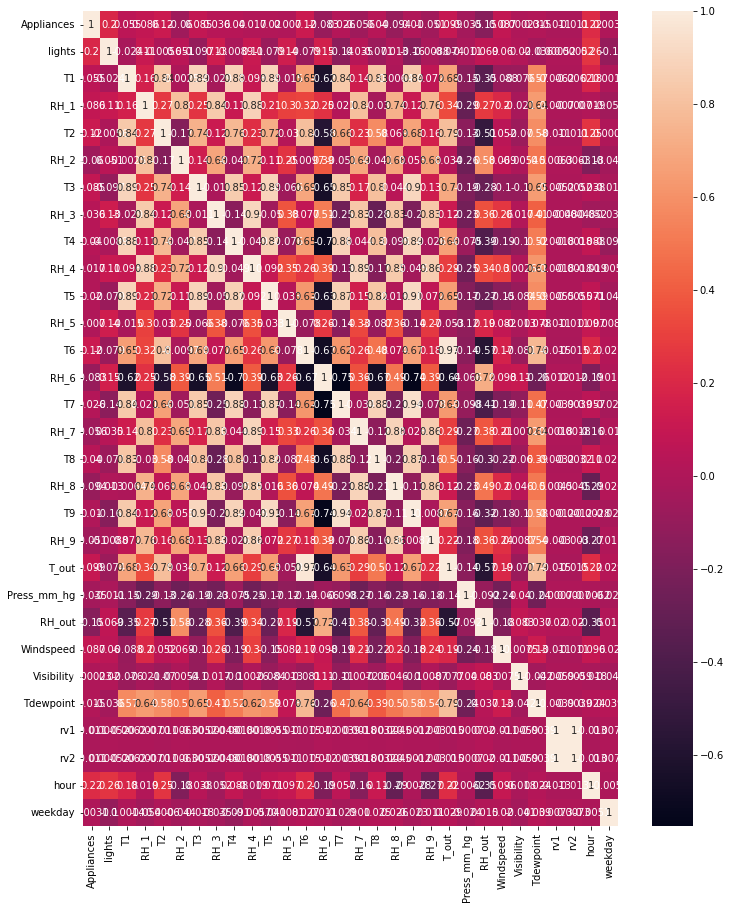

In [69]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,15))
sns.heatmap(appliance_energy.corr(),annot=True)

##### 1. Why did you pick the specific chart?

Because it help in reviewing and analyzing heat map data to gather insights about user interaction and behavior as they engage with our product.

##### 2. What is/are the insight(s) found from the chart?

**From here we see a particular square region as highly correlated , as they are different temperature of same house ,and humidity of same house**

#### Chart - 4 **Distribution Plot**

In [70]:
# Chart - 4 lets break into three parts
temp_col=['T1','T2','T3','T4','T5','T6','T7','T8','T9']
hum_col=['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9']
other_col=['T_out', 'Press_mm_hg', 'RH_out', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2']
     

<Figure size 720x576 with 0 Axes>

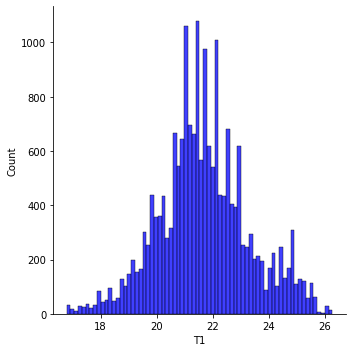

<Figure size 720x576 with 0 Axes>

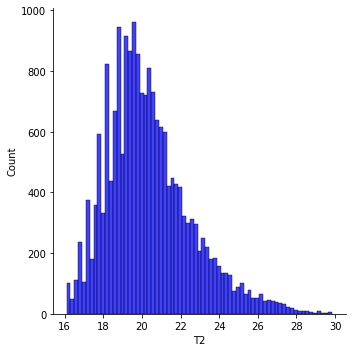

<Figure size 720x576 with 0 Axes>

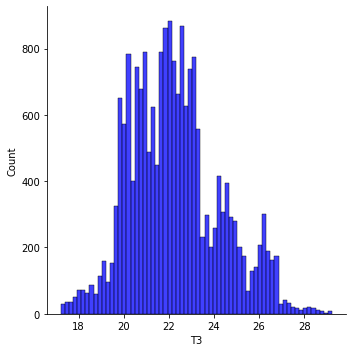

<Figure size 720x576 with 0 Axes>

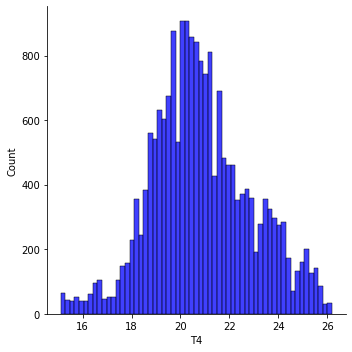

<Figure size 720x576 with 0 Axes>

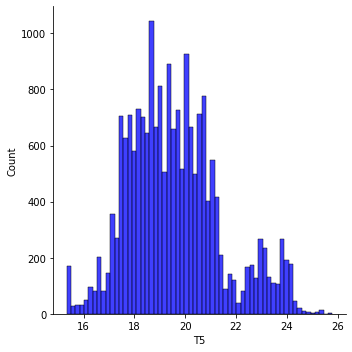

<Figure size 720x576 with 0 Axes>

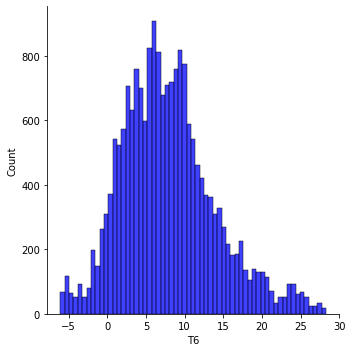

<Figure size 720x576 with 0 Axes>

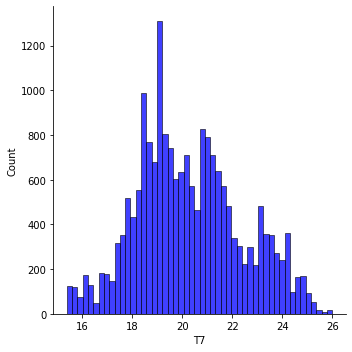

<Figure size 720x576 with 0 Axes>

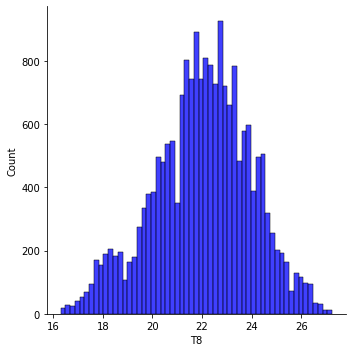

<Figure size 720x576 with 0 Axes>

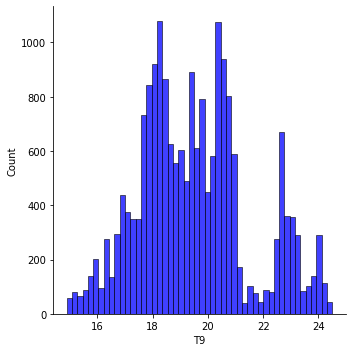

In [71]:
#first lets study temperature
for i in temp_col:
  plt.figure(figsize=(10,8))
  sns.displot(appliance_energy[i],color='blue')

<Figure size 720x576 with 0 Axes>

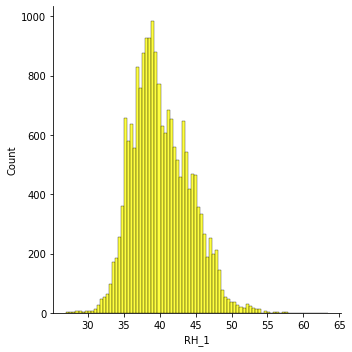

<Figure size 720x576 with 0 Axes>

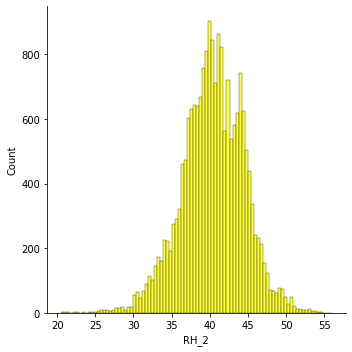

<Figure size 720x576 with 0 Axes>

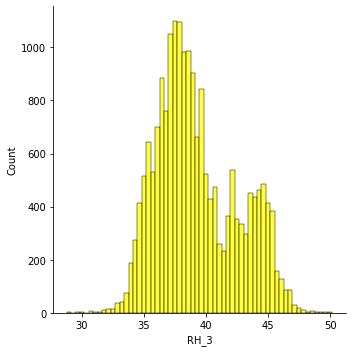

<Figure size 720x576 with 0 Axes>

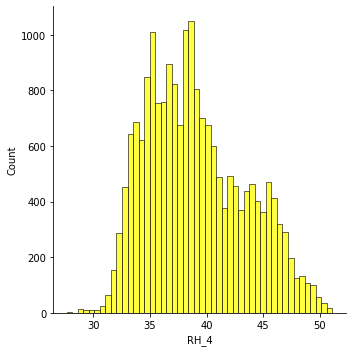

<Figure size 720x576 with 0 Axes>

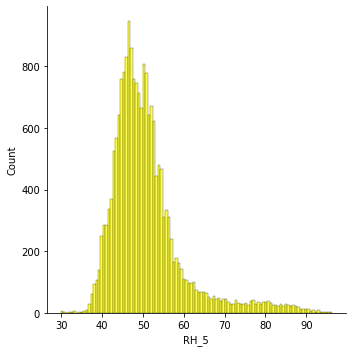

<Figure size 720x576 with 0 Axes>

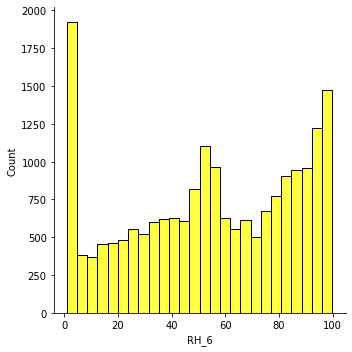

<Figure size 720x576 with 0 Axes>

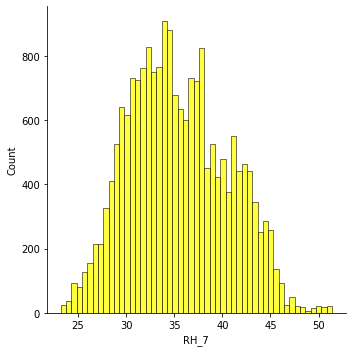

<Figure size 720x576 with 0 Axes>

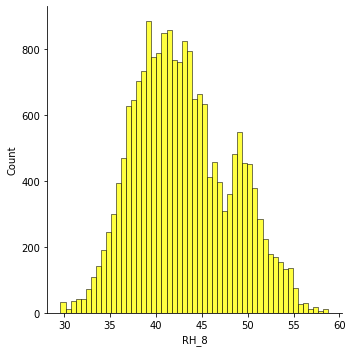

<Figure size 720x576 with 0 Axes>

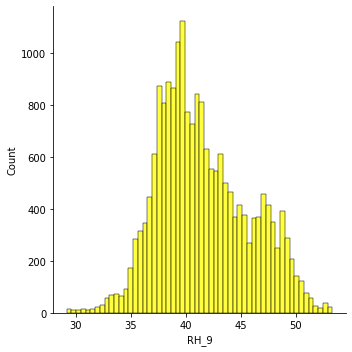

In [72]:
#Now lets study Humidity
for i in hum_col:
  plt.figure(figsize=(10,8))
  sns.displot(appliance_energy[i],color='yellow')

<Figure size 1440x648 with 0 Axes>

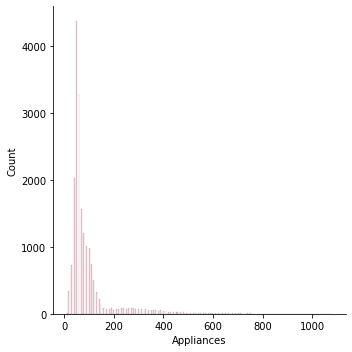

In [73]:

 #Now lets study target variable distribution
 plt.figure(figsize=(20,9))
 sns.displot(appliance_energy['Appliances'],color='pink')
 

##### 1. Why did you pick the specific chart?

Distplot(Distribution plot) is used to observe how the data is distributed in a particular dataset. More specificly, distplot is one kind of Univariate Distribution Plot .That is the reason I prefer to use this chart because its show the data is distributed .

##### 2. What is/are the insight(s) found from the chart?



*  All humidity values except RH_6 and RH_out follow a Normal distribution, i.e all the readings from sensors inside the home are from a Normal distribution..
*   Similarly, all temperature readings follow a Normal distribution except for T9.

*  Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
*   The output variable Appliances has most values less than 200Wh, showing that high energy consumption cases are very low.

*  No column has a distribution like the target variable Appliances.
* Hence, there are no feature independent feature with a linear relationship with the target.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact** : It helps to determine certain characteristics of the data and also provides as a base for using other certain statistical tools for decision making.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

In business , histograms can provide a useful tool for analyzing data and trends. They are used when you want to see how the data is distributed and the frequency of occurrence of some measurable event or property.

Businesses use column or bar charts to compare products or to show how much is used each day. This type of chart lends itself well as a comparison tool, as it's easy to visually see which item's column or bar is taller or longer.

# **Conclusion**

In this project, we have examined various concrete formulations with different Appliancess. We developed a graphs/charts that aligns to the available information. Utilizing model as a framework, we developed a fresh formulation and, being used to predicted the Appliances. 

In histogram charts, 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.

 The Insights from bar chart analysis for weedays  ,the consumption is higher on weekends , ie week number 0, 6, 5

For hour analysis ,the consumption is high in the evening time , ie hour between 16 and 20 

With the hep of EDA ,one can easily analyse the datasets .

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***